# CNN IMAGE CLASSIFCATION

A convolutional neural network is a class of deep learning which deals with processing image and video data by extracting features from them and build a neural network by assigning them weights and convolved them with a filter to classify and identify an image.

CNN is a prior choice of every data scientist to deal with any Image or video processing data. Using the transfer learning model and modifying it with our layers is also easy.

### Import Library & Project Dependencies

In [648]:
import tensorflow as tf # modeule for deep learning ML models
import cv2 # module capable for handling image processing with computer vision
import os # navigate the local machine
import imghdr # defin the type of an image
import numpy as np # used for numerical python  
import warnings # raise warning from the system
import matplotlib.pyplot as plt # graphical presentation of data


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model

warnings.filterwarnings('ignore')

In [649]:

# configure how the library handles GPU memory allocation. 

gpus = tf.config.experimental.list_physical_devices('GPU')

# When 'set_memory_growth' is set to True, TensorFlow will not allocate all available GPU memory upfront 
# but will grow the memory usage as needed by the application. This can be useful to avoid out-of-memory errors and 
#to allow multiple processes to share the same GPU.

for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### Data Preparations

In [650]:
data_dirs = '../data'

img_ext = ['jpeg', 'png', 'jpg', 'bmp', 'gif']


In [651]:
classes = os.listdir(data_dirs)
classes

['face masks', 'faces']

In [652]:
os.listdir(os.path.join(data_dirs, 'face masks'))

['-1x-1.jpg',
 '-1x-12.jpg',
 '-wearing-face-mask-outdoors-group-of-young-volunteers-coronavirus-1689113587.jpg',
 '0420_Face_Mask_Coronavirus_Logo.jpg',
 '09610761.jpg',
 '0d6c9c64010e4fa78cfd6e1f612ff539_18.jpeg',
 '106470396-1585760884847gettyimages-1208880165.jpeg',
 '106561859-1591111420806gettyimages-1216623969.jpeg',
 '106757648-1603404475911-gettyimages-1281710356-nng_6210_2020102252211420.jpeg',
 '1140-airport-some-people-masked.jpg',
 '1140-mask.jpg',
 '1140-one-way-mask-wearing.jpg',
 '12484908-72b1-4cc8-80f1-d7b2cdb21aea.jpeg',
 '13Lynteris4-superJumbo.jpg',
 '13MASKS-TRIPLEDEMIC3-1-f562-mediumSquareAt3X-v2.jpg',
 '158534-fwtzxupkhh-1619956007.jpg',
 '1a1bad51dab5431da041016d68ee7aae-1920.jpeg',
 '1d48f3ed68f5152b6f347b3f92a97284.jpg',
 '200423120222-01-face-masks-wellness-trnd-restricted.jpg',
 '2020-06-18T000000Z_977804565_MT1ABCPR0007VZ1DM_RTRMADP_3_ABACA-PRESS.jpg',
 '2023-02-28T014340Z_873108695_RC20KZ9L495C_RTRMADP_3_HEALTH-CORONAVIRUS-HONGKONG.jpg',
 '211029054205-co

In [653]:
# Loop over the files and detect if all the images are of exppected image extensions

for img_class in os.listdir('../data'):
    for image_path in os.listdir(os.path.join(data_dirs, img_class)):
        # print(image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path) # check if the images have expected format / exts
            if tip not in img_ext:
                print('The image file has the expected file extension {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Exception raise passed test:  {}'.format(image_path))

Exception raise passed test:  -1x-1.jpg
Exception raise passed test:  -1x-12.jpg
Exception raise passed test:  -wearing-face-mask-outdoors-group-of-young-volunteers-coronavirus-1689113587.jpg
Exception raise passed test:  0420_Face_Mask_Coronavirus_Logo.jpg
Exception raise passed test:  09610761.jpg
Exception raise passed test:  0d6c9c64010e4fa78cfd6e1f612ff539_18.jpeg
Exception raise passed test:  106470396-1585760884847gettyimages-1208880165.jpeg
Exception raise passed test:  106561859-1591111420806gettyimages-1216623969.jpeg
Exception raise passed test:  106757648-1603404475911-gettyimages-1281710356-nng_6210_2020102252211420.jpeg
Exception raise passed test:  1140-airport-some-people-masked.jpg
Exception raise passed test:  1140-mask.jpg
Exception raise passed test:  1140-one-way-mask-wearing.jpg
Exception raise passed test:  12484908-72b1-4cc8-80f1-d7b2cdb21aea.jpeg
Exception raise passed test:  13Lynteris4-superJumbo.jpg
Exception raise passed test:  13MASKS-TRIPLEDEMIC3-1-f562-m

## Data Processing 

In [654]:
# keras_data = tf.keras.utils.image_dataset_from_directory(data_dirs) # reads and accesses the Directories containing all files

In [655]:
keras_data = tf.keras.utils.image_dataset_from_directory(data_dirs, shuffle=True) # reads and accesses the Directories containing all files
scaled_iterator = keras_data.as_numpy_iterator() # convert the dataset into a numpy array of data
batch = scaled_iterator.next() # returns a new batch of arrays as they are shuffled with each run
batch

Found 1330 files belonging to 2 classes.


(array([[[[ 96.       ,  69.       ,  52.       ],
          [ 97.       ,  68.       ,  52.       ],
          [ 96.28125  ,  64.28125  ,  49.28125  ],
          ...,
          [165.47217  , 190.20654  , 198.00342  ],
          [160.64062  , 186.64062  , 199.64062  ],
          [155.45312  , 181.45312  , 194.45312  ]],
 
         [[ 97.6875   ,  69.       ,  51.15625  ],
          [ 96.762695 ,  67.15625  ,  49.46875  ],
          [ 98.6875   ,  65.84375  ,  49.15625  ],
          ...,
          [166.84375  , 191.57812  , 199.375    ],
          [161.35938  , 187.35938  , 200.35938  ],
          [156.29688  , 182.29688  , 195.29688  ]],
 
         [[ 98.546875 ,  69.953125 ,  50.734375 ],
          [ 98.171875 ,  67.640625 ,  48.97412  ],
          [ 99.779785 ,  66.563965 ,  48.751465 ],
          ...,
          [166.43604  , 191.17041  , 198.96729  ],
          [161.61963  , 187.61963  , 200.61963  ],
          [157.85938  , 183.85938  , 196.85938  ]],
 
         ...,
 
         [[2

In [656]:
batch[0].shape # Each batch consists of 32 images to be processed with 256 x 256 x 3 pixels

(32, 256, 256, 3)

In [657]:
batch[1] # This consists of the image labels
# label 0 - shows the images with face masks
# label 1 - shows the images without face masks

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1])

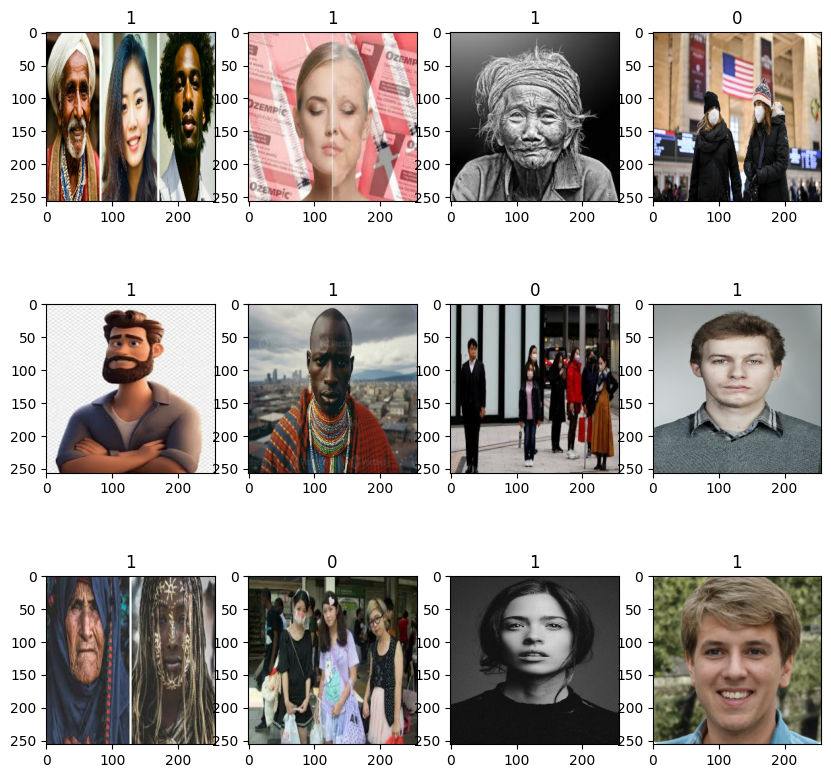

In [658]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(10, 10))
ax = ax.flatten()
for idx, image in enumerate(batch[0][:12]):
    ax[idx].imshow(image.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Splitting the Dataset into Training & Testing sets

In [659]:
# keras_data = keras_data.map(lambda x, y: (x/255, y))

In [660]:
train_size = int(len(keras_data)*.7) # we assign the training set a 70% size of the whole dataset
val_size = int(len(keras_data)*.2) # we assign 20%
test_size = int(len(keras_data)*.1) # we assign 10%

In [661]:
# The take method is used to select the first n elements from a dataset
# The skip method is used to skip the first n elements of a dataset.

train = keras_data.take(train_size)
val = keras_data.skip(train_size).take(val_size)
test = keras_data.skip(train_size + val_size).take(test_size)

## ML Model for Deep Learning Algorithm

In [662]:
model = Sequential()

In [663]:
model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, activation='relu', input_shape=(256,256,3))) # Extracts 16 feature maps from the input image using 3x3 filters.
model.add(MaxPooling2D()) # Downsamples the feature maps of the convolution layer

model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=16, kernel_size=(3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten()) # Converts the 2D feature maps into a 1D vector

model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

# Summary
# The model extracts and downsamples features through three convolutional and max pooling layers.
# The flattened features are passed through a fully connected layer.
# The final layer produces a single output value using the sigmoid activation function, suitable for binary classification.

In [664]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_51 (Conv2D)                   │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_49 (MaxPooling2D)      │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_50 (MaxPooling2D)      │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_51 (MaxPooling2D)      │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [665]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

## Train the Model

In [666]:
# Create a logs folder that will handle the logins and log files of the project
logs = '../logs'

In [667]:
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=logs)

 Benefits of callback 
 - Learning Rate: Track changes in learning rate if you are using learning rate schedules.
 - Comparing Runs: TensorBoard allows you to compare different training runs, helping you understand the impact of hyperparameter changes.
 - Scalability: Efficiently manage and compare multiple experiments.
 - Profiling: TensorBoard can help profile the performance of your model, identifying bottlenecks in computation and resource utilization.

In [668]:

def is_image_file(file_path):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
    return any(file_path.lower().endswith(ext) for ext in valid_extensions)

def check_images_in_directory(directory):
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            if not is_image_file(file_path):
                print(f"Unsupported image file format: {file_path}")
            else:
                try:
                    image = tf.io.read_file(file_path)
                    tf.image.decode_image(image, channels=3)
                except tf.errors.InvalidArgumentError:
                    print(f"Invalid image format for file: {file_path}")
                # os.remove(file_path)
                    

# Path to the directory containing images
directory_path = data_dirs

# Check images in the directory
check_images_in_directory(directory_path)


In [669]:
history = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callbacks])

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - accuracy: 0.5201 - loss: 215.4662 - val_accuracy: 0.6562 - val_loss: 0.6714
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.7320 - loss: 0.5597 - val_accuracy: 0.7500 - val_loss: 0.5627
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.9141 - loss: 0.2688 - val_accuracy: 0.7812 - val_loss: 0.4689
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.9766 - loss: 0.1394 - val_accuracy: 0.8242 - val_loss: 0.4184
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.9896 - loss: 0.0748 - val_accuracy: 0.8516 - val_loss: 0.4180
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9931 - loss: 0.0566 - val_accuracy: 0.8750 - val_loss: 0.3740
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9963 - loss: 0.0283 - val_accuracy: 0.8789 - val_loss: 0.4043
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9930 - loss: 0.0234 - val_accuracy: 0.9023 - val_los

In [670]:
os.listdir(logs)

['train', 'validation']

In [671]:
history.history

{'accuracy': [0.556034505367279,
  0.774784505367279,
  0.8987069129943848,
  0.9633620977401733,
  0.9795258641242981,
  0.9903017282485962,
  0.9924569129943848,
  0.9956896305084229,
  0.9946120977401733,
  0.9956896305084229],
 'loss': [81.7867660522461,
  0.5130531191825867,
  0.2765852212905884,
  0.143723264336586,
  0.09846074134111404,
  0.062075044959783554,
  0.04454230144619942,
  0.02393934316933155,
  0.016441060230135918,
  0.01866992935538292],
 'val_accuracy': [0.65625,
  0.75,
  0.78125,
  0.82421875,
  0.8515625,
  0.875,
  0.87890625,
  0.90234375,
  0.8671875,
  0.9140625],
 'val_loss': [0.6714497804641724,
  0.5626544952392578,
  0.4688626527786255,
  0.4184478223323822,
  0.41798731684684753,
  0.3739701509475708,
  0.4042767286300659,
  0.3539762496948242,
  0.496226042509079,
  0.39904093742370605]}

## Plot the Performance

Text(0.5, 1.0, 'Model Loss Performance')

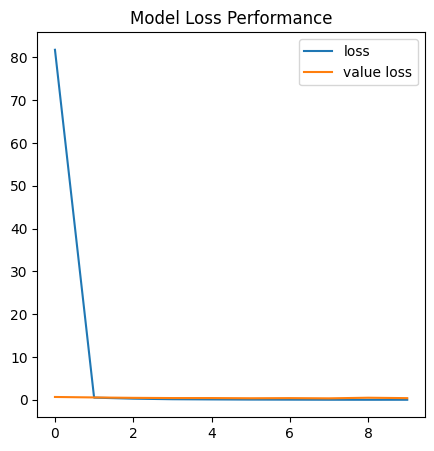

In [672]:
fig = plt.figure(figsize= (5, 5))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='value loss')
plt.legend(loc='upper right')
plt.title('Model Loss Performance')

Text(0.5, 1.0, 'Accuracy Performance of the Model')

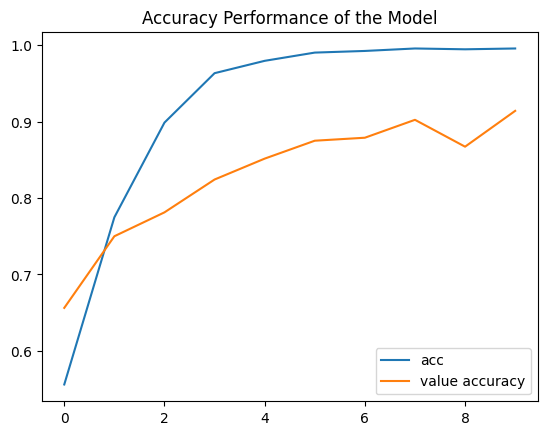

In [673]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='value accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy Performance of the Model')

## Evaluate the Performance

In [674]:
# Evaluate the metrics performance of the model
prec = Precision()
rec = Recall()
bin_acc = BinaryAccuracy()

In [675]:
for batch in test.as_numpy_iterator():
    x, y = batch
    y_pred = model.predict(x)
    prec.update_state(y, y_pred)
    rec.update_state(y, y_pred)
    bin_acc.update_state(y, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


In [676]:
print(f'Precision: {prec.result()}, Recall: {rec.result().numpy()}, Binary Accuracy: {bin_acc.result()}')

Precision: 0.8999999761581421, Recall: 0.6666666865348816, Binary Accuracy: 0.828125


## Manual Testing

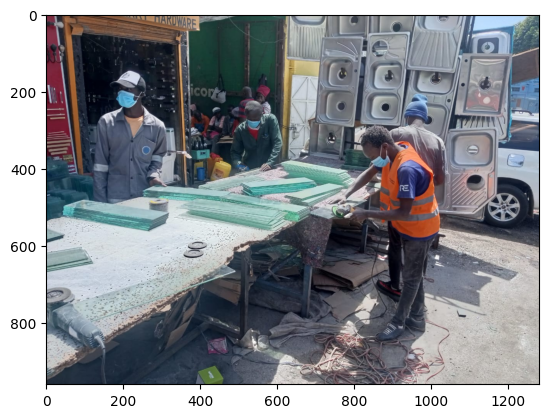

In [686]:
img_path = cv2.imread("D:\Downloads\image3.jpg")
plt.imshow(cv2.cvtColor(img_path, cv2.COLOR_RGB2BGR))

In [687]:
img_resize = tf.image.resize(img_path, (256, 256))

In [688]:
y_pred = model.predict(np.expand_dims(img_resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [689]:
y_pred

array([[0.5300819]], dtype=float32)

In [690]:
if y_pred > 0.5:
    print('The face image has no Face Mask')
else:
    print('The person is wearing a face mask')

The face image has no Face Mask


## Save the Model

In [691]:
model.save(os.path.join('../model', 'face_mask_detection.h5'), overwrite=True)

### load the model

In [692]:
new_model = load_model(os.path.join('../model', 'face_mask_detection.h5'))

In [693]:
new_model_predict = new_model.predict(np.expand_dims(img_resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step


In [694]:
new_model_predict

array([[0.5300819]], dtype=float32)